This dataset contains detailed information on car sales, covering multiple manufacturers and models. It is suitable for data analysis, price prediction, market trend analysis, machine learning, and exploratory data analysis (EDA).
The dataset includes information about manufacturers, car models, engine specifications, fuel type, year of manufacture, mileage, and final sale price.

Researchers, data scientists, and machine learning practitioners can use this dataset for:

Price prediction models (e.g., regression, XGBoost, deep learning)
Car valuation analysis for resale markets
Market trend analysis across manufacturers and fuel types
Data visualization projects

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#creating dataset
df=pd.read_csv('car_sales_data.csv')

In [3]:
df.head()

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101


In [4]:
df['Fuel type'].value_counts()

Fuel type
Petrol    25488
Diesel    13268
Hybrid    11244
Name: count, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  object 
 1   Model                50000 non-null  object 
 2   Engine size          50000 non-null  float64
 3   Fuel type            50000 non-null  object 
 4   Year of manufacture  50000 non-null  int64  
 5   Mileage              50000 non-null  int64  
 6   Price                50000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.7+ MB


In [6]:
#checking null value
df.isnull().sum()

Manufacturer           0
Model                  0
Engine size            0
Fuel type              0
Year of manufacture    0
Mileage                0
Price                  0
dtype: int64

In [7]:
#for fuel ,model, manufacture are object string , so using label nd onehot encoding
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
label=LabelEncoder()
fuel_encoded = label.fit_transform(df['Fuel type'])

fuel_df = pd.DataFrame(fuel_encoded, columns=['Fuel Type'], index=df.index)

# Concatenate with original DataFrame (excluding original column)
df = pd.concat([df.drop('Fuel type', axis=1), fuel_df], axis=1)




In [8]:
df.head()

,Manufacturer,Model,Engine size,Year of manufacture,Mileage,Price,Fuel Type
0,Ford,Fiesta,1.0,2002,127300,3074,2
1,Porsche,718 Cayman,4.0,2016,57850,49704,2
2,Ford,Mondeo,1.6,2014,39190,24072,0
3,Toyota,RAV4,1.8,1988,210814,1705,1
4,VW,Polo,1.0,2006,127869,4101,2


In [9]:
'''#now using onehot encoding
from sklearn.preprocessing import OneHotEncoder
encoder1=OneHotEncoder()
encoder2=OneHotEncoder()
encoded1=encoder1.fit(df[['Manufacturer']])
encoded2=encoder2.fit(df[['Model']])
df_encoded1=pd.DataFrame(encoded1,columns=encoder1.get_feature_names_out(),index=df.index)
df_encoded2=pd.DataFrame(encoded2,columns=encoder2.get_feature_names_out(),index=df.index)
df=pd.concat([df.drop(['Manufacturer','Model'],axis=1),df_encoded1,df_encoded2],axis=1)'''
label_encoder1 = LabelEncoder()
label_encoder2 = LabelEncoder()

# Apply label encoding
df['Manufacturer_encoded'] = label_encoder1.fit_transform(df['Manufacturer'])
df['Model_encoded'] = label_encoder2.fit_transform(df['Model'])

# Drop original columns
df = df.drop(['Manufacturer', 'Model'], axis=1)


In [10]:
df.head()

,Engine size,Year of manufacture,Mileage,Price,Fuel Type,Manufacturer_encoded,Model_encoded
0,1.0,2002,127300,3074,2,1,3
1,4.0,2016,57850,49704,2,2,0
2,1.6,2014,39190,24072,0,1,7
3,1.8,1988,210814,1705,1,3,11
4,1.0,2006,127869,4101,2,4,9


<Axes: >

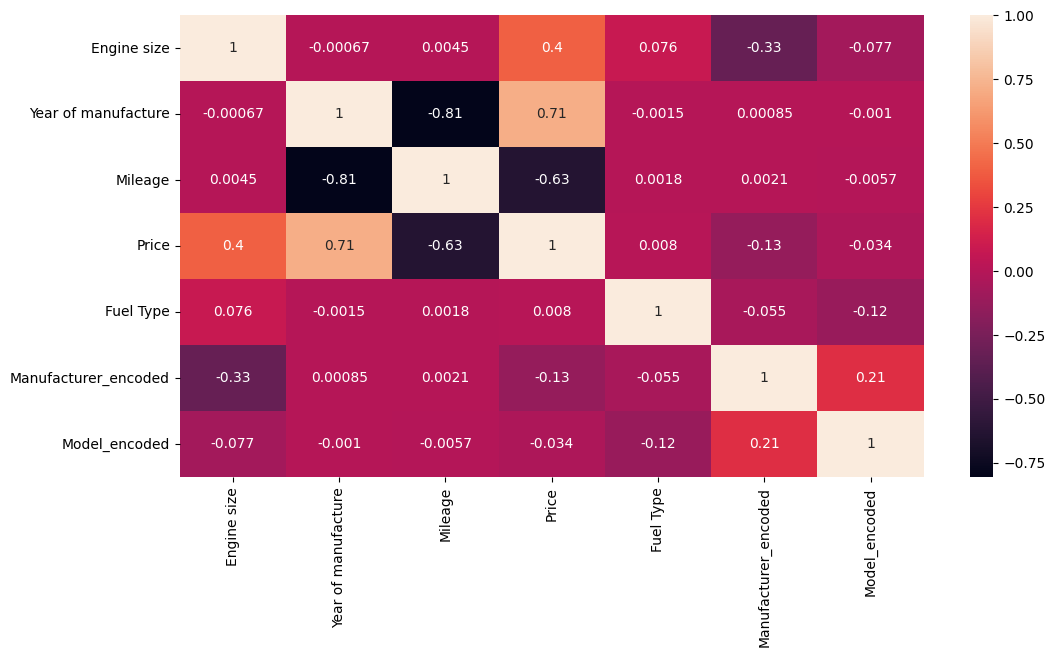

In [11]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

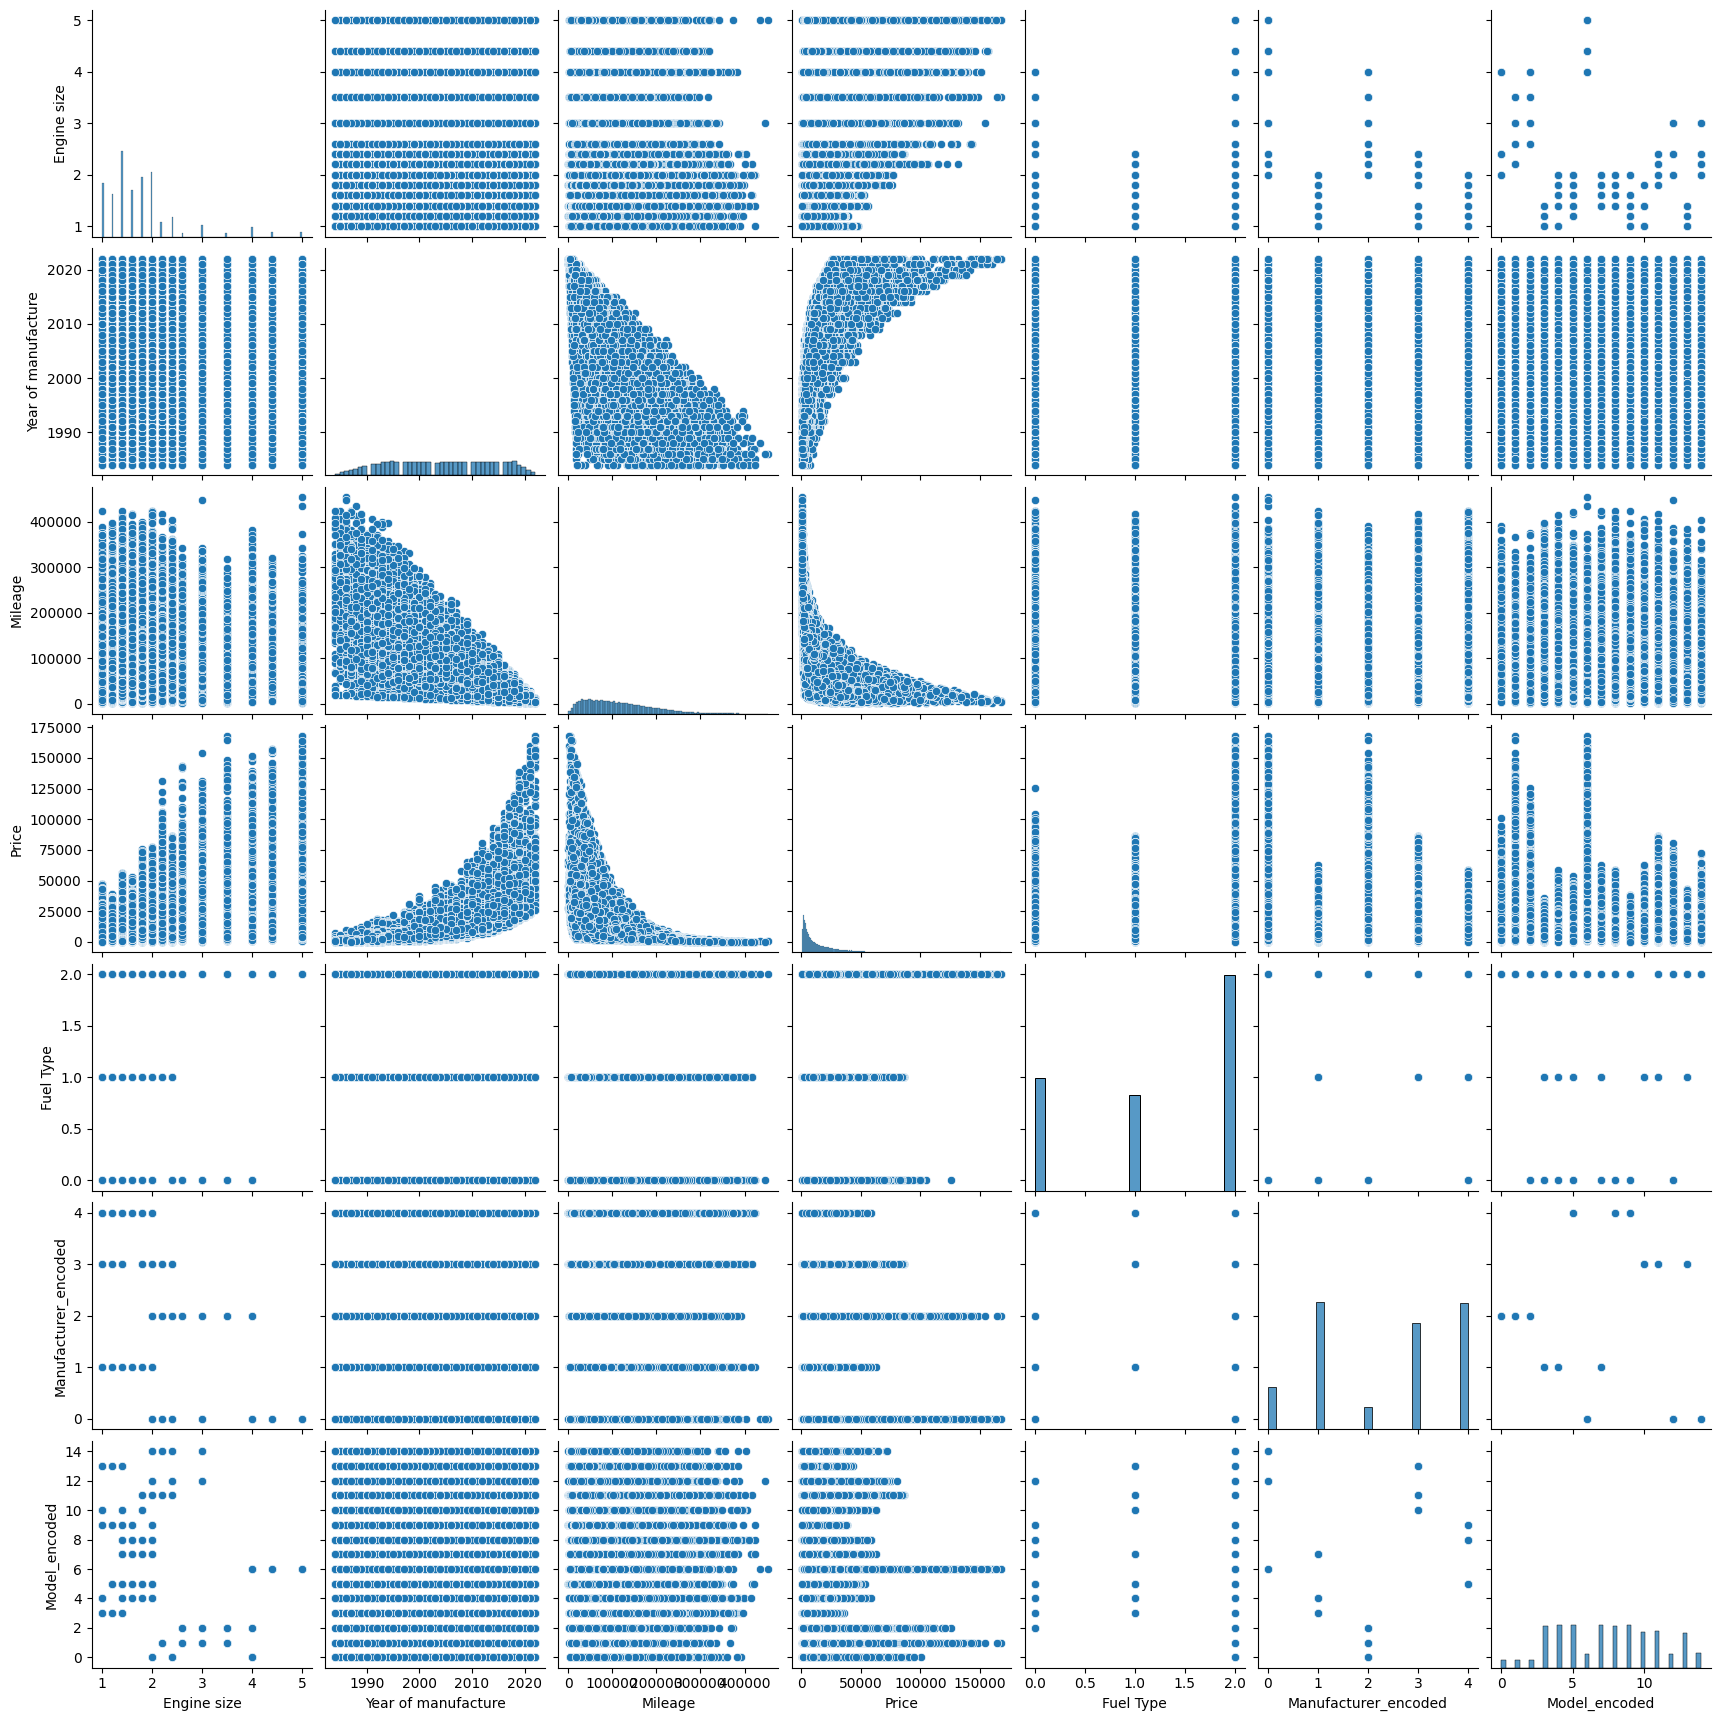

In [12]:
sns.pairplot(df)

In [13]:
#dependent and independent variable
X=df.drop('Price',axis=1)
y=df['Price']

In [14]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [15]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [16]:
#linear regression
from sklearn.linear_model import LinearRegression
l_reg=LinearRegression()
l_reg.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
y_pred=l_reg.predict(X_test)

In [18]:
#preformance matrices
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
validation_score=cross_val_score(l_reg,X_train,y_train,scoring='neg_mean_squared_error',
                                cv=3)

mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)
print(r2_score(y_test,y_pred))

87972222.58078237
6054.003835500751
9379.350861375342
0.6724992398470532


In [19]:
#using Svr
from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train,y_train)
y_pred_svr=svr.predict(X_test)

In [20]:
validation_score=cross_val_score(l_reg,X_train,y_train,scoring='neg_mean_squared_error',
                                cv=3)

mse=mean_squared_error(y_test,y_pred_svr)
mae=mean_absolute_error(y_test,y_pred_svr)
rmse=np.sqrt(mse)
print("mean square error",mse)
print("mean absolute error",mae)
print("root mean square",rmse)
print("R2 score",r2_score(y_test,y_pred_svr))

mean square error 249409401.5426557
mean absolute error 7975.191635906033
root mean square 15792.700894484633
R2 score 0.0715050023943038


In [ ]:


from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [1, 10, 100],
    'epsilon': [0.01, 0.1, 1],
    'gamma': ['scale', 0.01, 0.1]
}



# SVR model
model = SVR()

# Grid search
grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=1,   # <— run in main process
    verbose=2
)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END .....................C=1, epsilon=0.01, gamma=scale; total time=  37.2s
[CV] END .....................C=1, epsilon=0.01, gamma=scale; total time=  37.7s
[CV] END .....................C=1, epsilon=0.01, gamma=scale; total time=  40.9s
[CV] END .....................C=1, epsilon=0.01, gamma=scale; total time=  36.4s
[CV] END .....................C=1, epsilon=0.01, gamma=scale; total time=  36.4s
[CV] END ......................C=1, epsilon=0.01, gamma=0.01; total time=  36.7s
[CV] END ......................C=1, epsilon=0.01, gamma=0.01; total time=  38.5s
[CV] END ......................C=1, epsilon=0.01, gamma=0.01; total time=  38.6s
[CV] END ......................C=1, epsilon=0.01, gamma=0.01; total time=  38.4s
[CV] END ......................C=1, epsilon=0.01, gamma=0.01; total time=  37.5s
[CV] END .......................C=1, epsilon=0.01, gamma=0.1; total time=  37.0s
[CV] END .......................C=1, epsilon=0.